<a href="https://colab.research.google.com/github/fanny/information-retrieval/blob/master/lab2/text_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Processamento do texto das notícias

Começamos importando os dados e as dependências. Os dados se encontram no repositório do github, sendo assim fazemos uso de sua url de acesso.  
De dependências, temos:
- [pandas](https://pandas.pydata.org/) e o [numpy](http://www.numpy.org/), para obtenção das estatísticas.
- [ntlk](https://www.nltk.org/) para tokenização e geração de bigramas.   
- [seaborn](https://seaborn.pydata.org/) e matplotlib para geração dos gráficos
- [re](https://docs.python.org/3/library/re.html) para filtrar as palavras válidas

In [18]:
import re

import pandas as pd
import numpy as np

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/fanny/information-retrieval/master/lab2/data/results.csv')
data.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,_id,author,date,section,sub_title,text,title,url
0,7,NaN,05/04/2019 |,agronegocio,NaN,NaN,\t\t\t\t,https://www.gazetadopovo.com.br/agronegocio/ex...
1,2,NaN,NaN,wiseup-news,NaN,NaN,NaN,https://www.gazetadopovo.com.br/wiseup-news/bo...
2,3,NaN,NaN,futebol,NaN,NaN,NaN,https://especiais.gazetadopovo.com.br/futebol/...
3,9,NaN,05/04/2019 |,agronegocio,NaN,NaN,Suspensão de frigoríficos não impediu alta de ...,https://www.gazetadopovo.com.br/agronegocio/ag...
4,1,The Daily Signal,NaN,ideias,NaN,Pessoas que buscam uma identidade transsexual ...,Populares,https://www.gazetadopovo.com.br/ideias/nao-se-...
5,5,Gazeta do Povo,NaN,curitiba,NaN,"Depois de uma semana de calor, Curitiba terá u...",Populares,https://www.gazetadopovo.com.br/curitiba/previ...
6,40,"Flávia Alves, especial para a Gazeta do Povo",NaN,viver-bem,NaN,As promessas são muitas: combater o envelhecim...,NaN,https://www.gazetadopovo.com.br/viver-bem/saud...
7,6,Agência Estado,NaN,republica,NaN,"O líder do MDB na Câmara, Baleia Rossi (SP), p...",Populares,https://www.gazetadopovo.com.br/republica/pec-...
8,20,Daniel Malucelli,[05/04/2019],esportes,mercado,O meia-atacante Maicosuel está com a situação ...,Paraná não descarta dispensa de Maicosuel ante...,https://www.gazetadopovo.com.br/esportes/paran...
9,10,Renyere Trovão,NaN,automoveis,NaN,Concretizar a compra de um carro novo nem semp...,Populares,https://www.gazetadopovo.com.br/automoveis/car...


## Me diga aonde você vai que eu vou varrendo

Agora que temos os dados, precisamos remover as informações que não nos interessam, processo conhecido como *stopping* .
Definimos como não relevantes, as seguintes expressões:
- símbolos
- números  

Para chegar a esse resultado, comecei definindo um regex, que toda vez que encontrasse alguma expressão anterior em cada texto, substituisse por espaço, usando o pacote `re` para manipular o regex  e a função `apply` do pandas, para aplicar essa regra a cada linha do dataframe. Além disso, os valores `na` foram removidos.


In [0]:
def filter_valid_words(text):
  return re.sub(r'(\W+|\d+)', ' ', text.lower())

In [3]:
clean_text = data['text'].dropna()
clean_text = clean_text.apply(filter_valid_words)
clean_text.head(20)

4     pessoas que buscam uma identidade transsexual ...
5     depois de uma semana de calor curitiba terá um...
6     as promessas são muitas combater o envelhecime...
7     o líder do mdb na câmara baleia rossi sp proto...
8     o meia atacante maicosuel está com a situação ...
9     concretizar a compra de um carro novo nem semp...
10    o fim do horário de verão mudanças na secom e ...
12    uma levou ao encerramento da audiência na comi...
13    apenas um mês depois de sediar uma o vietnã de...
15    o equador planeja expulsar julian assange de s...
16    o ministro da economia paulo guedes refutou pe...
17    o presidente jair bolsonaro confirmou que irá ...
18     se você não tem a capacidade de convencer as ...
19    a bancada da bala nome informal da frente parl...
20    desembargador aposentado jornalista e nome rel...
21    instituído pela lei     de   o cumprimento do ...
22    entre todos os itens da agenda bc de medidas d...
23    no último sábado   mais de   pessoas lotar

## J. R. R. Tolkien

Dado que ignoramos as palavras que não são de nosso interesse, podemos *tokenizar* as palavras. E para nos auxiliar,  fazemos uso do método `word_tokenize` da biblioteca `nltk`.

In [4]:
all_formatted_text = clean_text.str.cat(sep=' ') 

word_list = word_tokenize(all_formatted_text)
words = pd.DataFrame(word_list, columns=['word'])
unique_words = words['word'].unique()
words.head(15)

,word
0,pessoas
1,que
2,buscam
3,uma
4,identidade
5,transsexual
6,não
7,nasceram
8,assim
9,e


## Sintonize na frequência

> "Entender a natureza estatística do texto é fundamental para entender modelos de recuperação da informação e algoritmos de rankeamento"

*trecho exraido do livro*

Tendo conhecimento dessa importância, extraímos para cada token gerado, a quantidade de ocorrências(tanto a absoluta, quanto relativa) do mesmo e sumarizamos na tabela abaixo, para tal, usamos o método `value_counts` do `pandas`,  e o `boolean indexing` para filtrar os dados apenas com as características de interesse, nesse caso, palavras que ocorrem mais de mil vezes ou apenas uma vez.

In [0]:
def get_percentage(value):
  return value * 100

In [6]:
frequencies = words['word'].value_counts()
relative_frequencies = words['word'].value_counts(normalize=True)
relative_frequencies = relative_frequencies.apply(get_percentage)

relative_frequencies.head(10)

de      4.654116
a       3.692480
o       3.274303
que     2.700369
e       2.483662
do      1.936816
da      1.637152
em      1.532184
para    1.317171
no      1.039515
Name: word, dtype: float64

In [7]:
statistics = {}
statistics['total_documents'] = len(clean_text)
statistics['total_words_occurences'] = len(words)
statistics['vocabulary_size'] = len(unique_words)
statistics['words_occurring_greater_1000_times'] = len(frequencies[frequencies > 1000])
statistics['words_occurring_once'] = len(frequencies[frequencies == 1])

data_statistics = pd.DataFrame(statistics, index=[0])
data_statistics

,total_documents,total_words_occurences,vocabulary_size,words_occurring_greater_1000_times,words_occurring_once
0,108,59066,9759,6,5151


## TOP 50 HITS


Como já tinhamos os dados estatísticos, para conseguir exibir o ranking, apenas criamos um novo dataframe com os critérios de rankeamento, que são:

- frequência
- posição(ranking)
- porcentagem de ocorrências totais
- *c* = r.Pr

Feito isso, exibimos apenas as 50 primeiros dados

In [8]:
ranking = np.arange(1,len(unique_words)+1)

most_frequent_words = {
    'frequency': frequencies,
    'r': ranking,
    'Pr(%)': relative_frequencies,
    'r.Pr': relative_frequencies * ranking
}

most_frequent_words = pd.DataFrame(most_frequent_words)
most_frequent_words.head(50)

,frequency,r,Pr(%),r.Pr
de,2749,1,4.654116,4.654116
a,2181,2,3.692480,7.384959
o,1934,3,3.274303,9.822910
que,1595,4,2.700369,10.801476
e,1467,5,2.483662,12.418312
do,1144,6,1.936816,11.620899
da,967,7,1.637152,11.460062
em,905,8,1.532184,12.257475
para,778,9,1.317171,11.854536
no,614,10,1.039515,10.395151


## "I see it, I like it"


Para conseguir visualizar como a frequência influência no ranking, como descreve a *Lei de Zipf*, tanto para os unigramas quanto para os bigramas, no caso do segundo, foi necessário utilizar o método `bigrams` do `nltk`, que gera os pares de palavras, usamos gráficos e como pode ser visto abaixo, quanto maior o ranking menor a frequência.

Obs*: Para o cálculo do C o Pr, foi calculado usando a frequência relativa, sendo assim, o *c* está mult. por 100.

In [0]:
c_unigram_expected = np.mean(most_frequent_words['r.Pr'])
predicted_ranking = c_unigram_expected / most_frequent_words['Pr(%)']

most_frequent_words['predicted_ranking'] = predicted_ranking

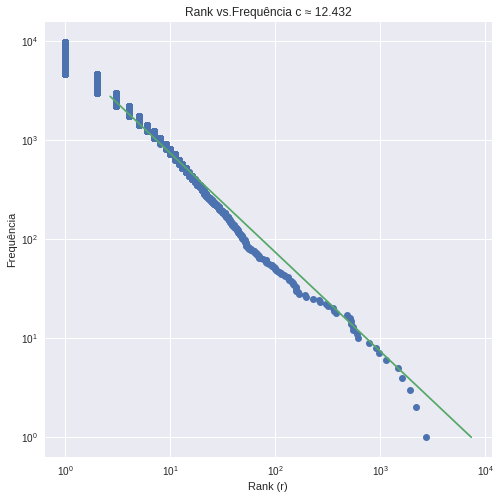

In [10]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")

plt.plot(most_frequent_words["frequency"], most_frequent_words["r"], linestyle="", marker="o")
plt.plot(most_frequent_words["predicted_ranking"], most_frequent_words["frequency"], linestyle="-", marker="")
plt.title('Rank vs.Frequência c ≈ {0:.3f}'.format(c_unigram_expected))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()


In [11]:

bigrams = list(nltk.bigrams(list(words['word'].values)))
bigrams_frequency = nltk.FreqDist(bigrams)

bigrams = pd.DataFrame({
    'bigram': list(bigrams_frequency.keys()),
    'frequency': list(bigrams_frequency.values()),
})
bigrams['ranking'] = bigrams['frequency'].rank(ascending=True, method='first')
bigrams['ranking'] = bigrams['ranking'].astype(int)
bigrams = bigrams.sort_values(by='ranking')
bigrams.tail()

,bigram,frequency,ranking
4010,"(para, a)",87,39279
849,"(com, a)",104,39280
158,"(com, o)",111,39281
143,"(que, a)",139,39282
52,"(que, o)",166,39283


In [12]:
bigram_frequencies = bigrams['bigram'].value_counts(normalize=True)
bigram_frequencies = bigram_frequencies.apply(get_percentage)

bigrams['Pr(%)'] = bigram_frequencies.values
bigrams['r.Pr'] = bigrams['Pr(%)'] * bigrams['ranking']

bigrams.head()

,bigram,frequency,ranking,Pr(%),r.Pr
2,"(buscam, uma)",1,1,0.002546,0.002546
3,"(uma, identidade)",1,2,0.002546,0.005091
4,"(identidade, transsexual)",1,3,0.002546,0.007637
5,"(transsexual, não)",1,4,0.002546,0.010183
6,"(não, nasceram)",1,5,0.002546,0.012728


In [0]:
c_bigram_expected = np.mean(bigrams['r.Pr'])
predicted_ranking = c_bigram_expected / bigrams['Pr(%)']

bigrams['predicted_ranking'] = predicted_ranking

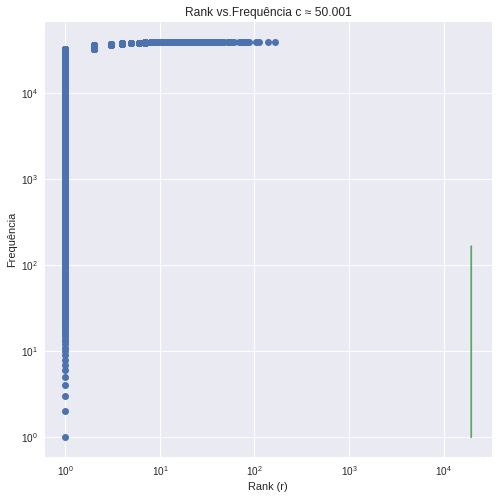

In [14]:
f, ax = plt.subplots(figsize=(8,8))
ax.set(xscale="log", yscale="log")

plt.plot(bigrams["frequency"], bigrams["ranking"], linestyle="", marker="o")
plt.plot(bigrams["predicted_ranking"], bigrams["frequency"], linestyle="-", marker="")
plt.title('Rank vs.Frequência c ≈ {0:.3f}'.format(c_bigram_expected))
plt.xlabel('Rank (r)')
plt.ylabel('Frequência')
plt.show()

## Previsões

Uma palavra pode ocorrer n vezes em um texto, se tivermos interessados em calcular a proporção de palavras com essa frequência, a *Lei de Zipf* afirma que ela será dada por essa fórmula:   
`1/n*(n+1)`  

Para obter os valores de frequencias, agrupamos(`groupby`) e aplicamos essa fórmula para cada um deles, desse modo, obtemos a proporção estimada.
Para a proporção real, usamos a quantidade de elementos de cada frequência e dividimos pelo total(tam do vocabulário).


In [0]:
def get_current_proportion(frequency):
  return frequency / statistics['vocabulary_size']

def get_predicted_proportions(occurrences):
  predicted_proportions = [] 
  for n in occurrences:
    predicted_proportion = 1 / (n * (n + 1))
    predicted_proportions.append(predicted_proportion)
  
  return predicted_proportions

In [0]:
grouped_words_by_frequency = most_frequent_words.groupby('frequency')['r']
current_number_of_words = grouped_words_by_frequency.count()
number_of_occurrences = grouped_words_by_frequency.groups.keys()
current_proportion = current_number_of_words.apply(get_current_proportion)
predicted_proportions = get_predicted_proportions(number_of_occurrences)

In [17]:
proportions_of_words = {
    'predicted_proportions': predicted_proportions,
    'current_proportion': current_proportion,
    'current_number_of_words': current_number_of_words
}
proportions_of_words = pd.DataFrame(proportions_of_words)
proportions_of_words.index.names = ['number_of_occurrences']
proportions_of_words.head(10)

,predicted_proportions,current_proportion,current_number_of_words
number_of_occurrences,,,
1,0.500000,0.527820,5151
2,0.166667,0.168460,1644
3,0.083333,0.079209,773
4,0.050000,0.045394,443
5,0.033333,0.033610,328
6,0.023810,0.019367,189
7,0.017857,0.018854,184
8,0.013889,0.013116,128
9,0.011111,0.010759,105
